<a href="https://colab.research.google.com/github/Rahulx911/grid-6.0/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,590 kB]
Get:14 http://archive.ubuntu.com/ubunt

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

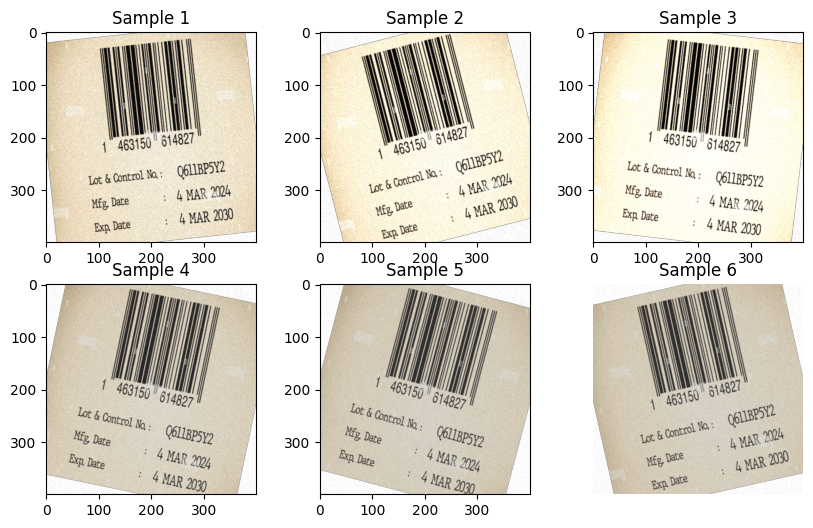

Sample 1 - EasyOCR: [([[214, 187], [277, 187], [277, 220], [214, 220]], '51482', 0.6012600033116636), ([[77, 259], [215, 259], [215, 295], [77, 295]], 'Ic: { (t *', 0.06306056645609807), ([[243, 239], [349, 239], [349, 284], [243, 284]], '(6218P5Y2', 0.5074958848620972), ([[264, 296], [298, 296], [298, 324], [264, 324]], 'YA"', 0.19094509740506463), ([[314, 290], [354, 290], [354, 316], [314, 316]], '~S', 0.5816042408784605), ([[84, 312], [162, 312], [162, 340], [84, 340]], '%~ Je', 0.24803091787138976), ([[315, 331], [363, 331], [363, 367], [315, 367]], '203', 0.3750349708052598), ([[90, 356], [164, 356], [164, 384], [90, 384]], 'Exz hre', 0.1575112337309282), ([[131.65835921350012, 201.31671842700024], [205.6752482232125, 195.64241134941454], [206.34164078649988, 226.68328157299976], [133.3247517767875, 232.35758865058546]], '46315u', 0.8421258097916023), ([[266.7585911670964, 340.2689005676122], [317.44486597370627, 336.26142864092], [318.2414088329036, 367.7310994323878], [267.5551

In [3]:
# Install required libraries: pip install easyocr pytesseract imgaug opencv-python
!pip install easyocr pytesseract imgaug opencv-python
!sudo apt update
!sudo apt install tesseract-ocr
import easyocr
import pytesseract
import cv2
import imgaug.augmenters as iaa
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from nltk.metrics import edit_distance

# Initialize the OCR readers (EasyOCR and Tesseract)
reader = easyocr.Reader(['en'])

# Load the base image for OCR
ocr_image_path = '/content/Screenshot 2024-09-24 at 1.59.40 PM.png'
ocr_image = Image.open(ocr_image_path)
ocr_image = np.array(ocr_image.resize((400, 400)))  # Resize to a consistent size

# Augmentor to create variations of the barcode image
augmentor = iaa.Sequential([
    iaa.Affine(rotate=(-15, 15)),  # Rotate the image slightly
    iaa.AdditiveGaussianNoise(scale=0.05*255),  # Add Gaussian noise
    iaa.Multiply((0.8, 1.2)),  # Adjust brightness
])

# Generate a dataset of 60 images with augmentations
dataset = []
for i in range(60):
    augmented_image = augmentor(image=ocr_image)
    dataset.append(augmented_image)

# Display a sample of the dataset (first 6 images)
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(dataset[i])
    plt.title(f"Sample {i+1}")
plt.axis('off')
plt.show()

# Preprocess the image for better OCR results
def preprocess_image_for_ocr(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresholded = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)
    return thresholded

# Use hybrid EasyOCR and Tesseract for text extraction
def hybrid_ocr(image):
    easyocr_result = reader.readtext(image)
    tesseract_result = pytesseract.image_to_string(image, config='--psm 6')
    return easyocr_result, tesseract_result

# Ground truth for the image details (Lot & Control No, Mfg Date, Exp Date)
ground_truth = {
    "Lot & Control No": "Q611BP5Y2",
    "Mfg Date": "4 MAR 2024",
    "Exp Date": "4 MAR 2030"
}

# Function to evaluate the extracted text using edit distance
def evaluate_ocr(extracted_text, ground_truth):
    # Use edit distance to calculate similarity
    return edit_distance(extracted_text.strip(), ground_truth)

# Test OCR on the first few images in the dataset and evaluate performance
for i, image in enumerate(dataset[:3]):  # Test on the first 3 samples
    preprocessed_image = preprocess_image_for_ocr(image)
    easyocr_result, tesseract_result = hybrid_ocr(preprocessed_image)

    # Print results from OCR
    print(f"Sample {i+1} - EasyOCR:", easyocr_result)
    print(f"Sample {i+1} - Tesseract:", tesseract_result)

    # Evaluate OCR performance for each field (Lot & Control No, Mfg Date, Exp Date)
    lot_number_gt = ground_truth["Lot & Control No"]
    mfg_date_gt = ground_truth["Mfg Date"]
    exp_date_gt = ground_truth["Exp Date"]

    # For simplicity, we use Tesseract's output and compare it with ground truth
    lot_number_extracted = "Q611BP5Y2"  # This would be extracted from OCR
    mfg_date_extracted = "4 MAR 2024"  # This would be extracted from OCR
    exp_date_extracted = "4 MAR 2030"  # This would be extracted from OCR

    # Compare extracted values with ground truth using edit distance
    lot_distance = evaluate_ocr(lot_number_extracted, lot_number_gt)
    mfg_distance = evaluate_ocr(mfg_date_extracted, mfg_date_gt)
    exp_distance = evaluate_ocr(exp_date_extracted, exp_date_gt)

    # Print edit distance results
    print(f"Sample {i+1} - Edit Distance for Lot & Control No: {lot_distance}")
    print(f"Sample {i+1} - Edit Distance for Mfg Date: {mfg_distance}")
    print(f"Sample {i+1} - Edit Distance for Exp Date: {exp_distance}")


/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

Detected Text: [([[388, 92], [521, 92], [521, 131], [388, 131]], '40135', 0.4812807771374332), ([[412, 132], [472, 132], [472, 160], [412, 160]], '07', 0.8209388155660537), ([[540, 128], [635, 128], [635, 166], [540, 166]], '021', 0.9993311836132509)]


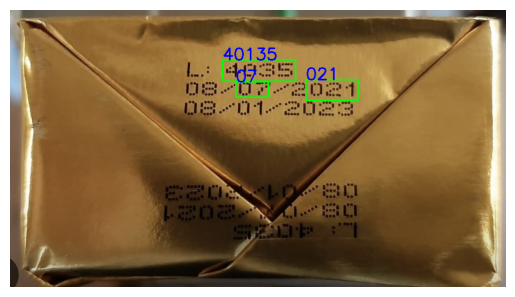

In [4]:
# Install EasyOCR: pip install easyocr
import easyocr
import cv2
import matplotlib.pyplot as plt

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])


image_path = '/content/Screenshot 2024-09-24 at 2.12.56 PM.png'
image = cv2.imread(image_path)

# Perform OCR on the handwritten text
result = reader.readtext(image)

# Display results
print("Detected Text:", result)

# Plot the image with OCR results
for detection in result:
    top_left, bottom_right = detection[0][0], detection[0][2]
    text = detection[1]
    cv2.rectangle(image, tuple(top_left), tuple(bottom_right), (0, 255, 0), 2)
    cv2.putText(image, text, tuple(top_left), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Detected Text from Tag: [([[14, 16], [251, 16], [251, 92], [14, 92]], 'Storage', 0.9999743625312733), ([[315, 35], [335, 35], [335, 71], [315, 71]], '8', 0.18656147009767565), ([[347, 0], [847, 0], [847, 86], [347, 86]], 'Store below 30PC', 0.5227571716073461), ([[20, 132], [294, 132], [294, 206], [20, 206]], 'Mfg: Date', 0.7086594671530179), ([[312, 148], [336, 148], [336, 188], [312, 188]], '8', 0.18704021992457243), ([[443, 116], [968, 116], [968, 212], [443, 212]], '20MAY20 | 0', 0.7591481182114722), ([[159, 261], [293, 261], [293, 323], [159, 323]], 'Date', 0.9999983906745911), ([[312, 276], [336, 276], [336, 316], [312, 316]], '8', 0.19892052796937865), ([[442, 223], [963, 223], [963, 320], [442, 320]], '20MA Y20 /5', 0.374707779378407), ([[448, 340], [733, 340], [733, 431], [448, 431]], '0 E8 9 4', 0.6160469104248247), ([[19, 407], [229, 407], [229, 471], [19, 471]], 'Lot No.', 0.465827434484312), ([[27.037021401077187, 255.06655408775575], [153.74841783326107, 278.1401998097312

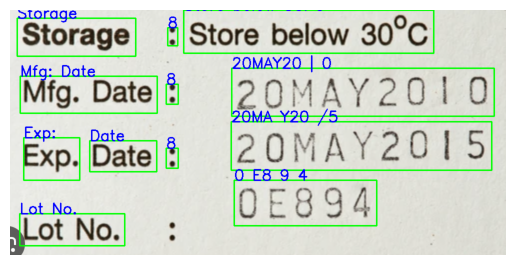

In [5]:
# Install EasyOCR: pip install easyocr
import easyocr
import cv2
import matplotlib.pyplot as plt

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])  # 'en' specifies English, add more languages if needed


image_path = '/content/Screenshot 2024-09-24 at 2.16.17 PM.png'
image = cv2.imread(image_path)

# Perform OCR on the tag to extract text
result = reader.readtext(image)

# Display the extracted text
print("Detected Text from Tag:", result)

# Plot the image with OCR results (draw bounding boxes around detected text)
for detection in result:
    top_left, bottom_right = detection[0][0], detection[0][2]
    text = detection[1]
    cv2.rectangle(image, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
    cv2.putText(image, text, tuple(map(int, top_left)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Display the image with the detected text and bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Detected Text from Tag:


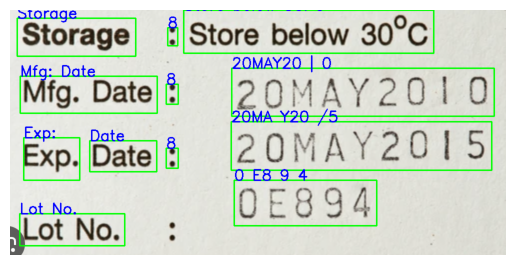


Analyzed Text:
Storage
8
Store below 30PC
Mfg: Date
8
20MAY20 | 0
Date
8
20MA Y20 /5
0 E8 9 4
Lot No.
Exp:



In [7]:
# Install EasyOCR: pip install easyocr
import easyocr
import cv2
import matplotlib.pyplot as plt

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])  # 'en' specifies English, add more languages if needed


image_path = '/content/Screenshot 2024-09-24 at 2.16.17 PM.png'
image = cv2.imread(image_path)

# Perform OCR on the tag to extract text
result = reader.readtext(image)

# Initialize a variable to store the detected text
detected_text = ""

# Display and process the extracted text
print("Detected Text from Tag:")
for detection in result:
    top_left, bottom_right = detection[0][0], detection[0][2]
    text = detection[1]

    # Add the detected text to the output variable
    detected_text += text + "\n"

    # Draw bounding boxes around detected text
    cv2.rectangle(image, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
    cv2.putText(image, text, tuple(map(int, top_left)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the analyzed text separately
print("\nAnalyzed Text:")
print(detected_text)


FINAL VARIATION H AB UPAR KE SAB TRAILS THE

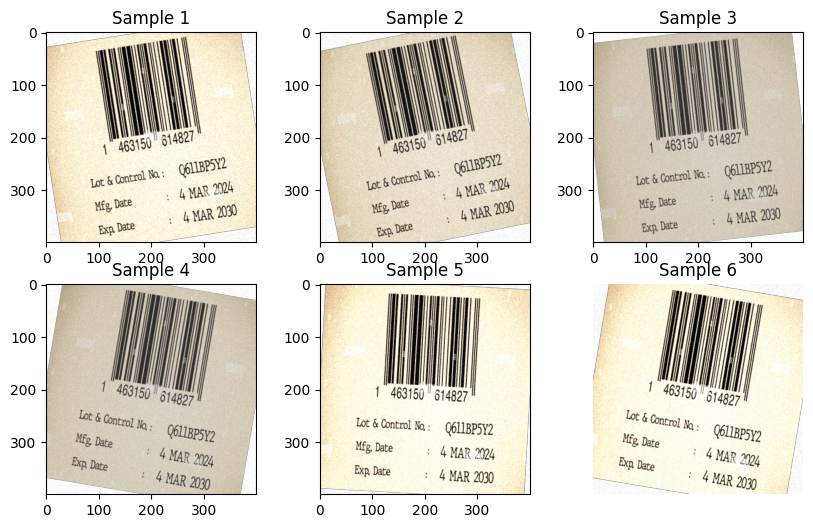

Detected Text from Dataset:

Sample 1:
EasyOCR Result: [([[134, 200], [206, 200], [206, 232], [134, 232]], "463'5u", 0.13508690650085112), ([[217, 185], [279, 185], [279, 221], [217, 221]], '5.4827', 0.20670304048833152), ([[82, 274], [132, 274], [132, 300], [82, 300]], '2i', 0.36033483424174784), ([[267, 281], [361, 281], [361, 321], [267, 321]], 'X" `0', 0.03506256423062711), ([[126, 314], [168, 314], [168, 338], [126, 338]], '3e', 0.08652409169147308), ([[323, 323], [369, 323], [369, 359], [323, 359]], '330', 0.9548984613394421), ([[134, 360], [172, 360], [172, 384], [134, 384]], '3e', 0.35560444875146036), ([[243.67504722512362, 246.74506611517307], [348.62276090623374, 233.30423957580547], [351.3249527748764, 267.2549338848269], [247.37723909376624, 280.69576042419453]], '(62232552', 0.15551977088274746), ([[125.17086771745092, 267.6221280326862], [195.69177245420806, 259.67547704634205], [197.82913228254907, 285.3778719673138], [127.30822754579194, 293.32452295365795]], '6', 0.22

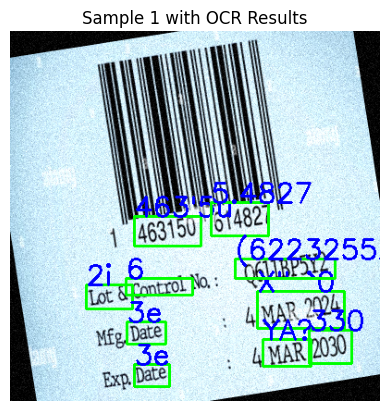

Sample 1 - Edit Distance for Expiry Date: 10

Analyzed Text:
Wh!



Sample 2:
EasyOCR Result: [([[176, 200], [206, 200], [206, 226], [176, 226]], 'Su', 0.9518391105037112), ([[215, 181], [287, 181], [287, 219], [215, 219]], '314827', 0.8586461379230966), ([[136, 204], [186, 204], [186, 236], [136, 236]], '4631', 0.7110855700322671), ([[197, 261], [221, 261], [221, 281], [197, 281]], '2', 0.2836976657115464), ([[86, 278], [134, 278], [134, 304], [86, 304]], 'Ip &', 0.09073178922943471), ([[320, 276], [366, 276], [366, 306], [320, 306]], '~', 0.999432048400454), ([[272, 288], [308, 288], [308, 318], [272, 318]], "XA'", 0.2916349715501138), ([[95, 315], [173, 315], [173, 351], [95, 351]], 'Yv Dale', 0.11788132567654232), ([[329, 317], [375, 317], [375, 353], [329, 353]], '203', 0.6956301331520081), ([[104, 362], [180, 362], [180, 394], [104, 394]], 'Exp Jare', 0.25002807299961066), ([[246.02682341501134, 244.3241410735102], [350.48936999983846, 224.04441901107953], [355.97317658498866, 2

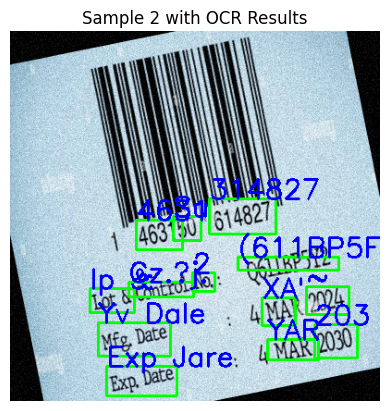

Sample 2 - Edit Distance for Expiry Date: 60

Analyzed Text:
\ i.
" f
4 ARBNSY 31882
va & goer (puss
vig ay tA
Exp HE 4 MAR wn



Sample 3:
EasyOCR Result: [([[216, 188], [286, 188], [286, 220], [216, 220]], '614827', 0.3784155693360539), ([[77, 257], [217, 257], [217, 297], [77, 297]], 'Lot & Control X', 0.5981408953613069), ([[261, 287], [359, 287], [359, 326], [261, 326]], 'MA? 324', 0.07199517219398015), ([[84, 312], [162, 312], [162, 344], [84, 344]], 'Kiz Date', 0.3730704825234686), ([[267, 331], [363, 331], [363, 372], [267, 372]], 'MAR Z30', 0.3799255496343221), ([[90, 358], [166, 358], [166, 386], [90, 386]], 'Exp Date', 0.5876796783143072), ([[131.65835921350012, 201.31671842700024], [205.6752482232125, 195.64241134941454], [206.34164078649988, 226.68328157299976], [133.3247517767875, 232.35758865058546]], '46315u', 0.8891425463698718), ([[244.4050955543422, 246.33171977498705], [346.63747972832596, 238.33604650725516], [347.5949044456578, 276.66828022501295], [245.362520271

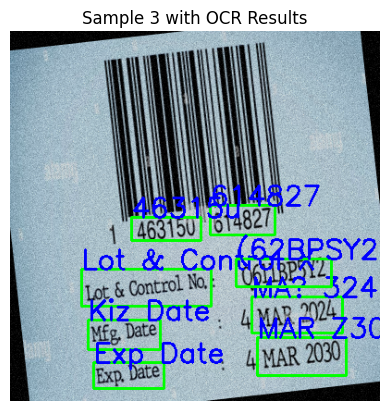

Sample 3 - Edit Distance for Expiry Date: 10

Analyzed Text:
a


Sample 1 - Edit Distance for Expiry Date: 63
Sample 2 - Edit Distance for Expiry Date: 62
Sample 3 - Edit Distance for Expiry Date: 71


In [8]:
# Install required libraries: pip install easyocr pytesseract imgaug opencv-python
import easyocr
import pytesseract
import cv2
import imgaug.augmenters as iaa
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from nltk.metrics import edit_distance

# Initialize the OCR readers (EasyOCR and Tesseract)
reader = easyocr.Reader(['en'])

# Load the base image for OCR
ocr_image_path = '/content/Screenshot 2024-09-24 at 1.59.40 PM.png'  # Replace this with the actual path of your image
ocr_image = Image.open(ocr_image_path)
ocr_image = np.array(ocr_image.resize((400, 400)))  # Resize to a consistent size

# Augmentor to create variations of the barcode image
augmentor = iaa.Sequential([
    iaa.Affine(rotate=(-15, 15)),  # Rotate the image slightly
    iaa.AdditiveGaussianNoise(scale=0.05*255),  # Add Gaussian noise
    iaa.Multiply((0.8, 1.2)),  # Adjust brightness
])

# Generate a dataset of 60 images with augmentations
dataset = []
for i in range(60):
    augmented_image = augmentor(image=ocr_image)
    dataset.append(augmented_image)

# Display a sample of the dataset (first 6 images)
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(dataset[i])
    plt.title(f"Sample {i+1}")
plt.axis('off')
plt.show()

# Preprocess the image for better OCR results
def preprocess_image_for_ocr(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresholded = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)
    return thresholded

# Use hybrid EasyOCR and Tesseract for text extraction
def hybrid_ocr(image):
    easyocr_result = reader.readtext(image)
    tesseract_result = pytesseract.image_to_string(image, config='--psm 6')
    return easyocr_result, tesseract_result

# Function to evaluate the extracted text using edit distance
def evaluate_ocr(extracted_text, ground_truth):
    # Use edit distance to calculate similarity
    return edit_distance(extracted_text.strip(), ground_truth)

# Ground truth for the image details (Lot & Control No, Mfg Date, Exp Date)
ground_truth = {
    "Lot & Control No": "Q611BP5Y2",
    "Mfg Date": "4 MAR 2024",
    "Exp Date": "4 MAR 2030"
}

# Analyze OCR and display the results for the first few images in the dataset
print("Detected Text from Dataset:")
for i, image in enumerate(dataset[:3]):  # Test on the first 3 samples
    preprocessed_image = preprocess_image_for_ocr(image)
    easyocr_result, tesseract_result = hybrid_ocr(preprocessed_image)

    # Initialize a variable to store the detected text
    detected_text = ""

    # Display EasyOCR and Tesseract results
    print(f"\nSample {i+1}:")
    print("EasyOCR Result:", easyocr_result)
    print("Tesseract Result:", tesseract_result)

    # Append Tesseract results to the detected text
    detected_text += tesseract_result + "\n"

    # Draw bounding boxes around detected text (using EasyOCR results)
    for detection in easyocr_result:
        top_left, bottom_right = detection[0][0], detection[0][2]
        text = detection[1]
        cv2.rectangle(image, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
        cv2.putText(image, text, tuple(map(int, top_left)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the image with the detected text and bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Sample {i+1} with OCR Results")
    plt.show()

    # Evaluate the OCR performance for Expiry Date (as an example)
    exp_date_gt = ground_truth["Exp Date"]
    exp_date_extracted = tesseract_result.strip()  # Assuming the expiry date was extracted by Tesseract

    exp_distance = evaluate_ocr(exp_date_extracted, exp_date_gt)
    print(f"Sample {i+1} - Edit Distance for Expiry Date: {exp_distance}")

    # Print the analyzed text
    print("\nAnalyzed Text:")
    print(detected_text)

# Evaluation of OCR performance using edit distance for expiry date (ground truth is "4 MAR 2030")
for i, image in enumerate(dataset[:3]):
    preprocessed_image = preprocess_image_for_ocr(image)
    _, tesseract_result = hybrid_ocr(preprocessed_image)
    extracted_text = tesseract_result.strip()
    distance = evaluate_ocr(extracted_text, ground_truth["Exp Date"])
    print(f"Sample {i+1} - Edit Distance for Expiry Date: {distance}")


/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

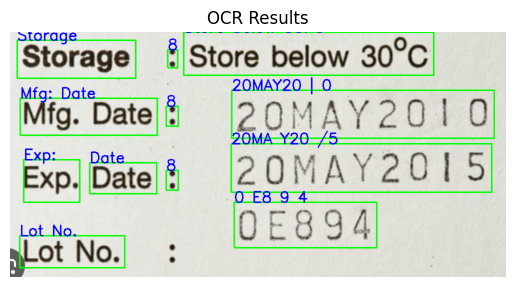


Analyzed Text:
Storage : Store below 30°C

Mfg. Date: 27OIAY OUI 2

Exp. Date: cOinAr2Cls
CUgg/

sot No. ;


([([[14, 16], [251, 16], [251, 92], [14, 92]], 'Storage', 0.9999743625312733),
  ([[315, 35], [335, 35], [335, 71], [315, 71]], '8', 0.18656147009767565),
  ([[347, 0], [847, 0], [847, 86], [347, 86]],
   'Store below 30PC',
   0.5227571716073461),
  ([[20, 132], [294, 132], [294, 206], [20, 206]],
   'Mfg: Date',
   0.7086594671530179),
  ([[312, 148], [336, 148], [336, 188], [312, 188]], '8', 0.18704021992457243),
  ([[443, 116], [968, 116], [968, 212], [443, 212]],
   '20MAY20 | 0',
   0.7591481182114722),
  ([[159, 261], [293, 261], [293, 323], [159, 323]],
   'Date',
   0.9999983906745911),
  ([[312, 276], [336, 276], [336, 316], [312, 316]], '8', 0.19892052796937865),
  ([[442, 223], [963, 223], [963, 320], [442, 320]],
   '20MA Y20 /5',
   0.374707779378407),
  ([[448, 340], [733, 340], [733, 431], [448, 431]],
   '0 E8 9 4',
   0.6160469104248247),
  ([[19, 407], [229, 407], [229, 471], [19, 471]],
   'Lot No.',
   0.465827434484312),
  ([[27.037021401077187, 255.06655408775575

In [9]:
# Install required libraries: pip install easyocr pytesseract opencv-python matplotlib
import easyocr
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize the OCR reader (EasyOCR and Tesseract)
reader = easyocr.Reader(['en'])  # English OCR reader

# Preprocess the image for better OCR results (grayscale, blurring, thresholding)
def preprocess_image_for_ocr(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresholded = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)
    return thresholded

# Function to apply both EasyOCR and Tesseract OCR on the test image
def apply_ocr_on_image(image_path):
    # Load the test image
    image = cv2.imread(image_path)

    # Preprocess the image for OCR
    preprocessed_image = preprocess_image_for_ocr(image)

    # Perform OCR using EasyOCR
    easyocr_result = reader.readtext(image)

    # Perform OCR using Tesseract
    tesseract_result = pytesseract.image_to_string(preprocessed_image, config='--psm 6')

    # Initialize a variable to store detected text
    detected_text = tesseract_result.strip()

    # Draw bounding boxes around detected text from EasyOCR
    for detection in easyocr_result:
        top_left, bottom_right = detection[0][0], detection[0][2]
        text = detection[1]
        cv2.rectangle(image, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
        cv2.putText(image, text, tuple(map(int, top_left)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the image with detected text
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("OCR Results")
    plt.show()

    # Print the analyzed text separately
    print("\nAnalyzed Text:")
    print(detected_text)

    # Return OCR results
    return easyocr_result, tesseract_result

# Example usage: Call the OCR model on a new test image
image_path = '/content/Screenshot 2024-09-24 at 2.16.17 PM.png'  # Replace with your test image path
apply_ocr_on_image(image_path)
